In [1]:
# Check current working directory
!pwd

/content


In [2]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')  # Mounts at /content/drive

Mounted at /content/drive


In [3]:
# GitHub setup in Colab for public repo (no PAT, no test push)

# STEP 1: Define repo details
username = "gbauer-at-sandiego-edu"  # GitHub username
repo = "fa25-aai521-group1"          # Repository name
org_or_user = "mr-kelsey"            # GitHub org or user
branch = "week-4-person-b"           # Target branch

# STEP 2: Clean up any previous clone
%cd /content
!rm -rf {repo}

# STEP 3: Clone the public repo via HTTPS
!git clone https://github.com/{org_or_user}/{repo}.git
%cd {repo}

# STEP 4: Configure Git identity
!git config --global user.name "{username}"
!git config --global user.email "gbauer@sandiego.edu"

# STEP 5: Create and switch to working branch
!git checkout -b {branch}


/content
Cloning into 'fa25-aai521-group1'...
remote: Enumerating objects: 531, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 531 (delta 13), reused 27 (delta 8), pack-reused 493 (from 1)
Receiving objects: 100% (531/531), 1.08 GiB | 30.47 MiB/s, done.
Resolving deltas: 100% (27/27), done.
Updating files: 100% (467/467), done.
/content/fa25-aai521-group1
Switched to a new branch 'week-4-person-b'


In [4]:
# Verify that the expected image directories exist and contain files

# Check low-resolution image directory
!ls -lh data/scaled  # Should contain files like 0801_x4.png

# Check high-resolution ground truth directory
!ls -lh data/truth   # Should contain files like 0801.png


total 88M
-rw-r--r-- 1 root root   26K Nov 13 20:58 0006_x16.png
-rw-r--r-- 1 root root  1.1M Nov 13 20:58 0006_x2.png
-rw-r--r-- 1 root root  304K Nov 13 20:58 0006_x4.png
-rw-r--r-- 1 root root   88K Nov 13 20:58 0006_x8.png
-rw-r--r-- 1 root root   25K Nov 13 20:58 0014_x16.png
-rw-r--r-- 1 root root  1.4M Nov 13 20:58 0014_x2.png
-rw-r--r-- 1 root root  342K Nov 13 20:58 0014_x4.png
-rw-r--r-- 1 root root   91K Nov 13 20:58 0014_x8.png
-rw-r--r-- 1 root root   25K Nov 13 20:58 0046_x16.png
-rw-r--r-- 1 root root  1.3M Nov 13 20:58 0046_x2.png
-rw-r--r-- 1 root root  349K Nov 13 20:58 0046_x4.png
-rw-r--r-- 1 root root   93K Nov 13 20:58 0046_x8.png
-rw-r--r-- 1 root root   27K Nov 13 20:58 0071_x16.png
-rw-r--r-- 1 root root  1.4M Nov 13 20:58 0071_x2.png
-rw-r--r-- 1 root root  381K Nov 13 20:58 0071_x4.png
-rw-r--r-- 1 root root  100K Nov 13 20:58 0071_x8.png
-rw-r--r-- 1 root root   24K Nov 13 20:58 0112_x16.png
-rw-r--r-- 1 root root  1.1M Nov 13 20:58 0112_x2.png
-rw-r--r-- 1 

In [5]:
# Import essential libraries for image processing and visualization

import os                      # File and directory operations
import cv2                     # OpenCV for image I/O and manipulation
import matplotlib.pyplot as plt  # Visualization
from PIL import Image          # Optional image handling (not used yet)
import numpy as np             # Numerical operations


In [6]:
# Define a function to collect matching low-res and high-res image pairs
def get_image_pairs(scale="x4"):
    low_res_dir = "data/scaled"
    high_res_dir = "data/truth"
    pairs = []

    # Iterate through low-res filenames and match with corresponding high-res files
    for fname in os.listdir(low_res_dir):
        if fname.endswith(f"_{scale}.png"):
            base = fname.split(f"_{scale}")[0]
            lr_path = os.path.join(low_res_dir, fname)
            hr_path = os.path.join(high_res_dir, f"{base}.png")

            # Only include pairs where both files exist
            if os.path.exists(hr_path):
                pairs.append((lr_path, hr_path))

    return pairs


In [7]:
# Display a low-resolution and high-resolution image pair side by side
def show_image_pair(lr_path, hr_path):
    # Load images using OpenCV
    lr = cv2.imread(lr_path)
    hr = cv2.imread(hr_path)

    # Convert BGR (OpenCV default) to RGB for matplotlib
    lr_rgb = cv2.cvtColor(lr, cv2.COLOR_BGR2RGB)
    hr_rgb = cv2.cvtColor(hr, cv2.COLOR_BGR2RGB)

    # Plot the images side by side
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Low-Resolution Input")
    plt.imshow(lr_rgb)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("High-Resolution Ground Truth")
    plt.imshow(hr_rgb)
    plt.axis("off")

    plt.show()

    # Print image dimensions for reference
    print(f"Low-res shape: {lr.shape}, High-res shape: {hr.shape}")


Found 56 image pairs.


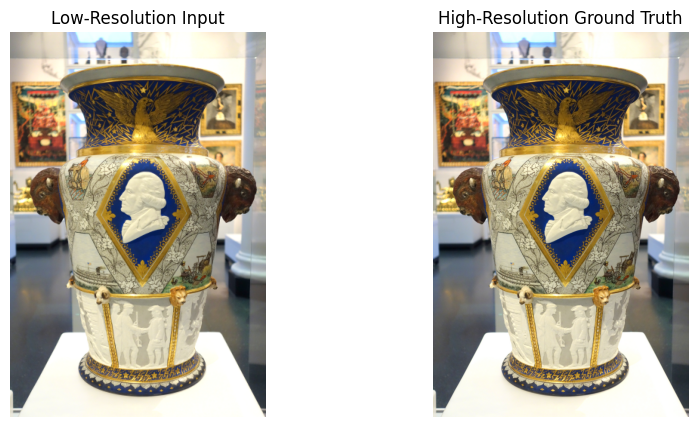

Low-res shape: (510, 339, 3), High-res shape: (2040, 1356, 3)


In [8]:
# Load image pairs with the specified scale
pairs = get_image_pairs("x4")
print(f"Found {len(pairs)} image pairs.")

# Display a sample image pair by index (ensure index is within bounds)
sample_index = 55
if sample_index < len(pairs):
    show_image_pair(*pairs[sample_index])
else:
    print(f"Index {sample_index} is out of range. Only {len(pairs)} pairs available.")


In [9]:
# Create an interactive slider to preview image pairs by index
import ipywidgets as widgets
from IPython.display import display

def interactive_preview(scale="x4"):
    pairs = get_image_pairs(scale)
    print(f"Found {len(pairs)} image pairs.")

    def update(idx):
        show_image_pair(*pairs[idx])

    slider = widgets.IntSlider(
        value=0,
        min=0,
        max=len(pairs) - 1,
        step=1,
        description='Image Index'
    )

    widgets.interact(update, idx=slider)

# Launch the interactive preview
interactive_preview("x4")


Found 56 image pairs.


interactive(children=(IntSlider(value=0, description='Image Index', max=55), Output()), _dom_classes=('widget-…

In [10]:
import pandas as pd

# Create a summary table of image pairs with their shapes
def summarize_pairs(scale="x4"):
    pairs = get_image_pairs(scale)
    summary = []

    for lr_path, hr_path in pairs:
        lr = cv2.imread(lr_path)
        hr = cv2.imread(hr_path)

        summary.append({
            "Filename": os.path.basename(lr_path),
            "LR Shape": lr.shape,
            "HR Shape": hr.shape
        })

    df = pd.DataFrame(summary)
    return df

# Display the summary table
summarize_pairs("x4")


,Filename,LR Shape,HR Shape
0,0865_x4.png,"(510, 339, 3)","(2040, 1356, 3)"
1,0422_x4.png,"(510, 339, 3)","(2040, 1356, 3)"
2,0543_x4.png,"(510, 339, 3)","(2040, 1356, 3)"
3,0724_x4.png,"(510, 339, 3)","(2040, 1356, 3)"
4,0124_x4.png,"(510, 339, 3)","(2040, 1356, 3)"
5,0246_x4.png,"(510, 339, 3)","(2040, 1356, 3)"
6,0879_x4.png,"(510, 339, 3)","(2040, 1356, 3)"
7,0597_x4.png,"(510, 339, 3)","(2040, 1356, 3)"
8,0565_x4.png,"(510, 339, 3)","(2040, 1356, 3)"
9,0006_x4.png,"(510, 339, 3)","(2040, 1356, 3)"


In [11]:
!pwd

/content/fa25-aai521-group1


In [ ]:
# Safely copy the notebook into the repo directory
!cp "/content/drive/MyDrive/Colab Notebooks/DIV2K_loader.ipynb" "/content/fa25-aai521-group1/notebooks/superres/DIV2K_loader.ipynb"

In [ ]:
# Install GitHub CLI (if not already installed)
!which gh || apt install gh -y

# Authenticate using the token securely
!gh auth login --with-token < /content/drive/MyDrive/token.txt

# Confirm authentication status
!gh auth status


/usr/bin/gh
? Authenticate Git with your GitHub credentials? (Y/n) 7

In [ ]:
# Ensure you're in the repo directory before committing
%cd /content/fa25-aai521-group1/notebooks/superres

# Stage and commit the updated notebook
!git add DIV2K_loader.ipynb
!git commit -m "Update DIV2K_loader.ipynb from Colab"

# Push to the target branch (will prompt for login if needed)
!git push origin week-4-person-b


/content/fa25-aai521-group1/notebooks/superres
[week-4-person-b 6cb1253] Update DIV2K_loader.ipynb from Colab
 1 file changed, 1 insertion(+)
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
!ls -lh /content/fa25-aai521-group1/notebooks/superres/DIV2K_loader.ipynb


-rw-r--r-- 1 root root 0 Nov 13 20:20 /content/fa25-aai521-group1/notebooks/superres/DIV2K_loader.ipynb
